Churn prediction
-------------------
Company churn occurs when companies cancel subscriptions or subscriptions expires without renewals.  
This notebook uses LogisticRegression to predict Churn.

**Note:**
- only setup completed accounts are included.

In [0]:
from datetime import datetime

# define a date that license deactivation date will check against in determinding churn or no-churn,
# typically today or the date dataset was created.
pred_datetime = datetime(2020, 7, 21)

# start datetime for license activation.
start_dateime = datetime(2000, 1, 1)

# include both registered and non registered users
registered_only = True

# whether over_sampling or not
sampling = True

In [0]:
%run /Users/bxing@actsoft.com/Churn/Churn_Dataframe

Remove features

In [0]:
categorical_features = ["Tier", "UserIntegrationType"]

Out[14]: (3515, 24)

,CompanyId,InstanceId,CompanyName,Tier,IsSetupComplete,UserIntegrationType,AccountId,AccountName,City,RegionName,PostalCode,CountryCode,Culture,Activation,Expiration,Deactivation,Duration,Churn,Licenses,Incidents,Trips,Forms,Timekeeping,Orders
0,822,50,Ward Alternative Energy,10,True,0,694,Ward Alternative Energy,Fort Collins,Colorado,80521,US,en-US,2016-01-21,2016-07-22,2016-09-10 13:06:06.760,233,1,9,85,2819,0,66,0
1,872,50,TECS ELECTRIC LTD,30,True,0,744,TECS ELECTRIC LTD,Weatherford,TX,76087,US,en-US,2016-01-27,2016-04-08,2016-09-10 13:06:21.940,227,1,43,0,0,5,4,624
2,1027,50,Hood River Taxi,10,True,0,899,Hood River Taxi,Hood River,Oregon,97031,US,en-US,2016-02-12,2016-04-04,2016-09-10 13:06:52.400,211,1,8,0,922,0,0,0
3,1107,50,AAA Signs Inc,10,True,0,979,AAA Signs Inc,Sacramento,California,95815,US,en-US,2016-03-04,2017-12-21,2017-12-21 00:13:54.140,657,1,34,0,16683,2,0,6
4,1478,50,Precious Ones Day Care,10,True,0,1340,Precious Ones Day Care,Bethlehem,Pennsylvania,None,US,en-US,2016-04-20,2019-06-22,2019-06-22 00:14:20.290,1158,1,5,0,0,0,2,0


In [0]:
df = df[categorical_features + [target] + numerical_features]
print(list(df.columns))

['Tier', 'UserIntegrationType', 'Churn', 'Licenses', 'Duration', 'Incidents', 'Trips', 'Forms', 'Timekeeping', 'Orders']

In [0]:
df.groupby('Tier').mean()

,UserIntegrationType,Churn,Licenses,Duration,Incidents,Trips,Forms,Timekeeping,Orders
Tier,,,,,,,,,
2,0.000000,0.000000,21.000000,48.000000,0.000000,1531.000000,0.000000,0.000000,0.000000
5,0.000000,0.851064,29.787234,253.758865,4.014184,19663.737589,0.234043,0.631206,0.035461
10,0.003851,0.856868,68.903723,495.513479,3.282413,97972.732991,13910.077664,163.577022,23.405006
20,0.000000,0.919791,29.542284,478.157803,2.585004,8654.873583,1637.555362,631.244115,465.691369
30,0.000000,0.929641,36.667665,490.043413,3.329341,11418.175150,2249.703593,861.781437,745.076347


In [0]:
count_no_churn = len(df[df['Churn']==0])
count_churn = len(df[df['Churn']==1])
pct_of_no_churn = count_no_churn/(count_no_churn+count_churn)
print("percentage of no churn is", pct_of_no_churn*100)
pct_of_churn = count_churn/(count_no_churn+count_churn)
print("percentage of churn", pct_of_churn*100)

percentage of no churn is 10.924608819345663
percentage of churn 89.07539118065434

Create dummy variables for categorical variables

In [0]:
cat_vars=['Tier', 'UserIntegrationType']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
    
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]
df_final=df[to_keep]
df_final.columns.values

Out[20]: array(['Churn', 'Licenses', 'Duration', 'Incidents', 'Trips', 'Forms',
 'Timekeeping', 'Orders', 'Tier_2', 'Tier_5', 'Tier_10', 'Tier_20',
 'Tier_30', 'UserIntegrationType_0', 'UserIntegrationType_3'],
 dtype=object)

In [0]:
from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit_transform(df_final.values[:, [1,2,3,4,5,6,7]])
scaled_features_df = pd.DataFrame(scaled_features, index=df_final.index, columns=['Licenses', 'Duration', 'Incidents', 'Trips', 'Forms', 'Timekeeping','Orders'])

# df_final['Licenses'] = scaled_features_df['Licenses']
# df_final['Duration'] = scaled_features_df['Duration']
df_final.update(scaled_features_df)

df_final.head()

,Churn,Licenses,Duration,Incidents,Trips,Forms,Timekeeping,Orders,Tier_2,Tier_5,Tier_10,Tier_20,Tier_30,UserIntegrationType_0,UserIntegrationType_3
0,1,-0.040076,-0.625118,4.314961,-0.020151,-0.019562,-0.112920,-0.099483,0,0,1,0,0,1,0
1,1,-0.005449,-0.640366,-0.162898,-0.021376,-0.019548,-0.131526,0.104763,0,0,0,0,1,1,0
2,1,-0.041094,-0.681026,-0.162898,-0.020975,-0.019562,-0.132726,-0.099483,0,0,1,0,0,1,0
3,1,-0.014615,0.452385,-0.162898,-0.014129,-0.019556,-0.132726,-0.097519,0,0,1,0,0,1,0
4,1,-0.044149,1.725567,-0.162898,-0.021376,-0.019562,-0.132126,-0.099483,0,0,1,0,0,1,0


Data looks imbalanced. We perform Over-sampling using SMOTE.

In [0]:
from sklearn import preprocessing

X = df_final.loc[:, df_final.columns != 'Churn']
y = df_final.loc[:, df_final.columns == 'Churn']

In [0]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SMOTENC

os = SMOTENC(k_neighbors=3, random_state=0, sampling_strategy=0.5, categorical_features=[7,8,9,10,11,12,13])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

if sampling:
  # we only over-sample training data and leave test data intact   
  os_data_X, os_data_y = os.fit_sample(X_train, y_train)
  os_data_X = pd.DataFrame(data=os_data_X, columns=columns )
  os_data_y = pd.DataFrame(data=os_data_y, columns=['Churn'])
else:
  os_data_X = X_train
  os_data_y = y_train

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no churn data in oversampled data",len(os_data_y[os_data_y['Churn']==0]))
print("Number of churn data in oversampled data",len(os_data_y[os_data_y['Churn']==1]))
print("Proportion of no churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==0])/len(os_data_X))
print("Proportion of churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==1])/len(os_data_X))

length of oversampled data is 3312
Number of no churn data in oversampled data 1104
Number of churn data in oversampled data 2208
Proportion of no churn data in oversampled data is 0.3333333333333333
Proportion of churn data in oversampled data is 0.6666666666666666

In [0]:
X.head()

,Licenses,Duration,Incidents,Trips,Forms,Timekeeping,Orders,Tier_2,Tier_5,Tier_10,Tier_20,Tier_30,UserIntegrationType_0,UserIntegrationType_3
0,-0.040076,-0.625118,4.314961,-0.020151,-0.019562,-0.112920,-0.099483,0,0,1,0,0,1,0
1,-0.005449,-0.640366,-0.162898,-0.021376,-0.019548,-0.131526,0.104763,0,0,0,0,1,1,0
2,-0.041094,-0.681026,-0.162898,-0.020975,-0.019562,-0.132726,-0.099483,0,0,1,0,0,1,0
3,-0.014615,0.452385,-0.162898,-0.014129,-0.019556,-0.132726,-0.097519,0,0,1,0,0,1,0
4,-0.044149,1.725567,-0.162898,-0.021376,-0.019562,-0.132126,-0.099483,0,0,1,0,0,1,0


In [0]:
X=os_data_X
y=os_data_y['Churn']

print(X.columns.values)

['Licenses' 'Duration' 'Incidents' 'Trips' 'Forms' 'Timekeeping' 'Orders'
 'Tier_2' 'Tier_5' 'Tier_10' 'Tier_20' 'Tier_30' 'UserIntegrationType_0'
 'UserIntegrationType_3']

Logistic Regression Model Fitting

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X, y)

Out[26]: LogisticRegression()

In [0]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85

**Testing**
- Confusion Matrix
- Classification Report
- AOC Curve

In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 49 83]
 [ 80 843]]

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

precision recall f1-score support

 0 0.38 0.37 0.38 132
 1 0.91 0.91 0.91 923

 accuracy 0.85 1055
 macro avg 0.65 0.64 0.64 1055
weighted avg 0.84 0.85 0.84 1055

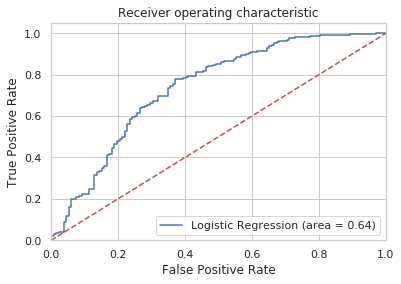

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()